## Midterm BME 502 2025

In this midterm exam, you are tasked to develop a method to tell whether data is better described by a line fit or a sigmoidal fit.

In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `c:\Users\steal\Downloads\Zero2Hero-JuliaWorkshop-main\BME-502-2025-homeworks`


In [2]:
Pkg.add(["Plots","Distributions","Random","Statistics","NonlinearSolve","ForwardDiff"])

   Resolving package versions...
  No Changes to `C:\Users\steal\Downloads\Zero2Hero-JuliaWorkshop-main\BME-502-2025-homeworks\Project.toml`
  No Changes to `C:\Users\steal\Downloads\Zero2Hero-JuliaWorkshop-main\BME-502-2025-homeworks\Manifest.toml`


In [4]:
using Plots, Distributions, Random, Statistics, NonlinearSolve, ForwardDiff, LinearAlgebra

In [5]:
line_fit(x,p) = p[1] .+ p[2] .* x

line_fit (generic function with 1 method)

In [6]:
sigmoid_fit(x,p) = p[1] .+ p[2] ./ (1 .+ exp.(-p[3]*(x .- p[4])))

sigmoid_fit (generic function with 1 method)

Let's create some plots to see how these functions look

In [7]:
x = 0:0.1:10

0.0:0.1:10.0

In [8]:
y_line = line_fit(x,[2,0.5])

2.0:0.05:7.0

In [9]:
y_sigmoid = sigmoid_fit(x,[2.5,3.5,0.1,5.5])

101-element Vector{Float64}:
 3.7805254314621974
 3.788656537923644
 3.796809108114118
 3.8049828179038157
 3.8131773393604975
 3.8213923407935093
 3.8296274867991844
 3.837882438307629
 3.8461568526308625
 3.854450383512326
 ⋮
 4.57010642451473
 4.5785558602695
 4.586989447538757
 4.595406810393582
 4.603807575969294
 4.612191374526542
 4.620557839511163
 4.6289066076128
 4.637237318822277

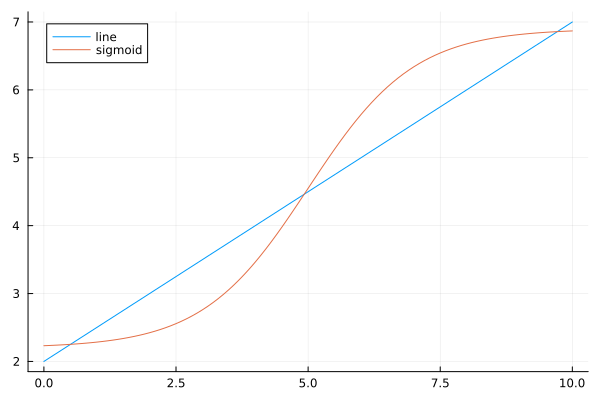

In [10]:
y_line = line_fit(x,[2,0.5])
y_sigmoid = sigmoid_fit(x,[2.2,4.7,1,5.0])
plot(x, y_line, label = "line")
plot!(x, y_sigmoid, label = "sigmoid")

Let us add some serious noise to it

In [11]:
nd = Normal(0,5)
x_line = 10*rand(200)
y_line_n = line_fit(x_line,[2,0.5]) .+ rand(nd,length(x_line))
x_sigmoid = 10*rand(200)
y_sigmoid_n = sigmoid_fit(x_sigmoid,[2.2,4.7,1,5.0]) .+ rand(nd,length(x_sigmoid))

200-element Vector{Float64}:
  0.3932950147345875
  8.563886588485301
  7.955419070144428
  3.3046264751666716
 -2.2615497288935513
  4.964757934468803
  3.2032939900130923
  1.0170587838932446
  2.1039577117944
 12.386130447267478
  ⋮
 -0.04133424373066319
  2.5677100052279975
  6.713936746989981
  8.327315333884776
 -2.1870717609213046
  3.521602844999796
 -3.662153425912912
  7.88190461721959
  8.517598491567368

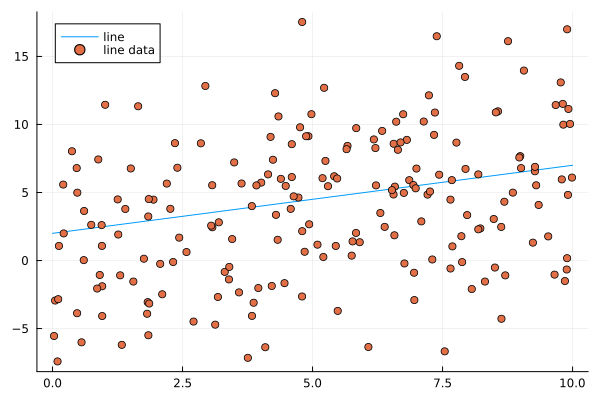

In [12]:
plot(x, y_line, label = "line")
scatter!(x_line, y_line_n, label = "line data")

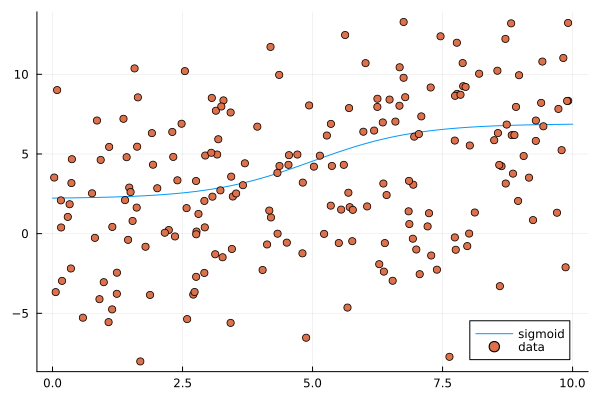

In [13]:
plot(x, y_sigmoid, label = "sigmoid")
scatter!(x_sigmoid, y_sigmoid_n, label = "data")

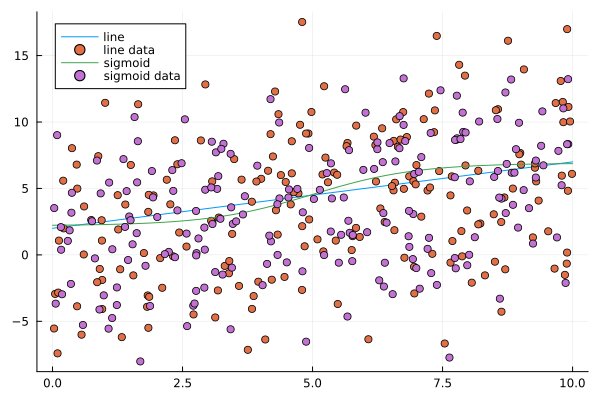

In [14]:
# let's plot it all together
plot(x, y_line, label = "line")
scatter!(x_line, y_line_n, label = "line data")
plot!(x, y_sigmoid, label = "sigmoid")
scatter!(x_sigmoid, y_sigmoid_n, label = "sigmoid data")

# Question:

If you take the sigmoid data, which fit is better? The linear or sigmoid?

How uncertain are the parameters?

At what noise level are the two fits equally likely?

# Part 1 (20 points)
Create a function line_fitting(x,y; sigma=[]) that returns the best parameters and the covariance matrix.  The standard deviation of the measurement error, sigma, can be supplied as a number (assuming that all measurements share the same error) or as a vector with the same length as y. If sigma (standard deviation of measurement error) is not specified (sigma=[]), estimate the measurement error using the sum of least squares to estimate $\mathcal{X}^2$.

In [32]:
function res(u, (x,y))
    return u[1] .* exp.( -u[2] .* x) .- y
end

res (generic function with 1 method)

In [38]:
function line_fitting(x, y, σ) 
    # Use y_line and y_sigmoid
    fit_line = y_line
    fit_sigmoid = y_sigmoid
    
    # Retrieve parameters
    fit_line.param
    fit_sigmoid.param

    # Covariance matrix
    cov_line = sqrt(estimate_covar(fit_line))   
    cov_sigmoid = sqrt(estimate_covar(fit_sigmoid))

    # Chi2 values
    chi2 = sum(res(u, (x, y)) .^ 2 ./ 0.1^2)

    # What if σ = []?
    if σ == []
        σ = sqrt(sum(res(u, (x, y)) .^ 2) / length(y))  # Estimate sigma using sum of squared residuals
        chi2 = sum(res(u, (x, y)) .^ 2 ./ σ^2)  # Recalculate chi2 using estimated sigma
    end
    
    return fit_line.param, fit_sigmoid.param, cov_line, cov_sigmoid, chi2
end


line_fitting (generic function with 1 method)

In [40]:
params_line, params_sigmoid, cov_line, cov_sigmoid, chi2 = line_fitting(x, y, σ)
println("Line Fit Parameters: ", params_line)
println("Sigmoid Fit Parameters: ", params_sigmoid)
println("Covariance (Line): ", cov_line)
println("Covariance (Sigmoid): ", cov_sigmoid)
println("Chi-Squared Value: ", chi2)

UndefVarError: UndefVarError: `σ` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

# Part 2 (20 points)
Similarily, create a function sigmoid_fitting(x,y; sigma=[]) that returns the best parameters and the covariance matrix. Treat sigma the same way as in Part 1.

In [ ]:
function sigmoid_fitting(x, y, σ) 
    # Use y_line and y_sigmoid
    fit_line = y_line
    fit_sigmoid = y_sigmoid
    
    # Retrieve parameters
    fit_line.param
    fit_sigmoid.param

    # Covariance matrix
    cov_line = sqrt(estimate_covar(fit_line))   
    cov_sigmoid = sqrt(estimate_covar(fit_sigmoid))

    # Chi2 values
    chi2 = sum(res(u, (x, y)) .^ 2 ./ 0.1^2)

    # What if σ = []?
    if σ == []
        σ = sqrt(sum(res(u, (x, y)) .^ 2) / length(y))  # Estimate sigma using sum of squared residuals
        chi2 = sum(res(u, (x, y)) .^ 2 ./ σ^2)  # Recalculate chi2 using estimated sigma
    end
    
    return fit_line.param, fit_sigmoid.param, cov_line, cov_sigmoid, chi2
end


# Part 3 (30 points)
Create a function p_ratio_sig_line(x,y; sigma=[]) that returns the Posterior ratio between a fit to a sigmoid and to a line.  Treat sigma the same way as in Part 1-2.

In [ ]:
function p_ratio_sig_line(x, y, σ)


    # What if σ = []?
    if σ == []
        σ = sqrt(sum(res(u, (x, y)) .^ 2) / length(y))  # Estimate sigma using sum of squared residuals
        chi2 = sum(res(u, (x, y)) .^ 2 ./ σ^2)  # Recalculate chi2 using estimated sigma
    end
end

# Part 4 (30 points)
Create a function sig_p_ratio_is_one(x,y; sigma=[]) that returns the measurement error (either as a number or array depending on how the sigma is supplied) that would result in a posterior ratio between sigmoid and line of one. If sigma is not provided (sigma=[]), proceed as in Part 1-3.

## Programming Advice:
To make your program more efficient you should think about creating functions that provide information that you can use for all of the parts.  Don't write each function individually, but think what are the common task that need to be done, and then call these more general functions, to get you the result for the specific questions.  I will reward good programming style with a bonus 10 points total.